In [1]:
!pip install numpy==1.16.1
import numpy as np

timesteps = 100 # number of timestamps in the input sequence
input_features = 32 # dimensionality of the input feature space
output_features = 64 # dimensionality of the output feature space 

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,)) # initial state as an all zero vector 

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:  #input_t is a vector of shape(input_features) 
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [4]:
from keras.layers import Dense, SimpleRNN, Embedding
from keras.models import Sequential
# 4 simpleRNN layers with fifth layer as dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Trai

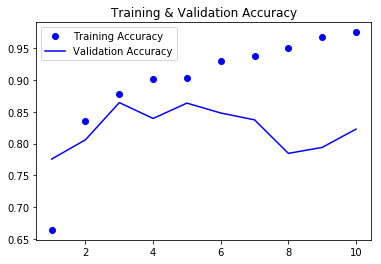

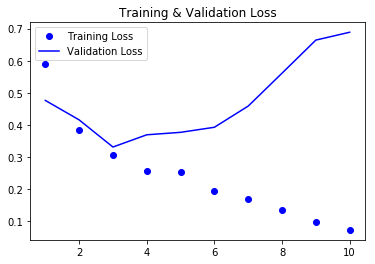

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()

In [0]:
# LSTM Model - here we specify output dimensionality of LSTM layer
# leave all other arguments at keras default 
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(x_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 77s 4ms/step - loss: 0.5172 - acc: 0.7588 - val_loss: 0.3400 - val_acc: 0.8608
Epoch 2/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.2951 - acc: 0.8858 - val_loss: 0.3035 - val_acc: 0.8828
Epoch 3/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.2368 - acc: 0.9100 - val_loss: 0.3005 - val_acc: 0.8788
Epoch 4/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.2028 - acc: 0.9259 - val_loss: 0.5363 - val_acc: 0.8050
Epoch 5/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.1799 - acc: 0.9348 - val_loss: 0.3844 - val_acc: 0.8740
Epoch 6/10
16128/20000 [=======================>......] - ETA: 13s - loss: 0.1559 - acc: 0.9462

In [0]:
#plot same way as simpleRNN

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()